Regresie Liniară
==============


* Tudor Berariu, Andrei Nica 2018

* Alexandru Sorici 2020

## 1. Scopul Laboratorului

Scopul laboratorului îl reprezintă înțelegerea algoritmului de **regresie liniară**, precum și a noțiunilor de _extragere de atribute (features)_ _complexitate a modelului_ și _regularizare_.

## 2. Problema de rezolvat

Problema de rezolvat în acest laborator este una de învățare supervizată, mai concret, de **regresie**. 

Fiind date eșantionări de puncte (samples) **(X, t)**, generate de o funcție necunoscută, se dorește construirea unui **model liniar** care să poată _potrivi_ setul de date **X** (să aproximeze funcția) și care să poată fi utilizat pentru a _evalua/prezice_ valori noi.

Vom explora trei aspecte ale problemei de **regresie liniară**:
* Regresie liniara simplă (potrivirea unei drepte)
* Regresie liniară folosind **extragere de atribute** (eng. _feature extraction_)
* **Regularizare**, **analiza complexității modelului de regresie** și **influența numărului de date de antrenare**

## 3. Regresie liniară simplă

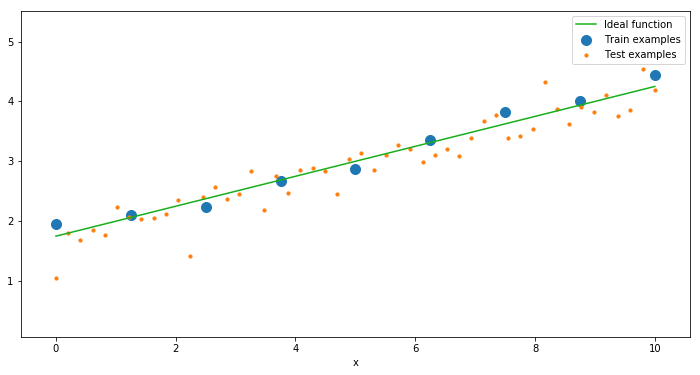

Se dă setul de date (**X**, **t**) constând dintr-o mulțime **X** de N puncte de dimensiune D (i.e. fiecare ${\bf x^{(i)}} \in {\bf X}$ este de forma ${\bf x} = (x_1, x_2, ..., x_D)$).
Pentru fiecare ${\bf x}^{(n)} \in X$ există un $t^{(n)}$ reprezentând valoarea unei funcții $f$ (necunoscute nouă) în punctul ${\bf x}^{(n)}$, i.e. $t^{(n)} = f({\bf x}^{(n)})$.

Un model de regresie liniară simplă care dorește să aproximeze funcția $f$ este definit ca $${\bf y} = {\bf X} {\bf w} + b$$ unde ${\bf w}$ este un vector D-dimensional de ponderi, iar $b$ este termenul de bias.

In regresia liniară simplă se caută soluția de **formă închisă**:
$${\bf w}^* = \underset{{\bf w}}{\arg\!\min} \sum_{n} \left({\bf x^{(n)}} {\bf w} - t^{(n)}\right)^2$$
$${\bf w}^* = \left({\bf X}^\intercal {\bf X}\right)^{-1} {\bf X}^\intercal {\bf t} = {\bf X}^{\dagger} {\bf t}$$

unde ${\bf X^{\dagger}}$ este _pseudo inversa_ matricii ${\bf X}$.


## 4. Regresie liniara cu extragere de atribute

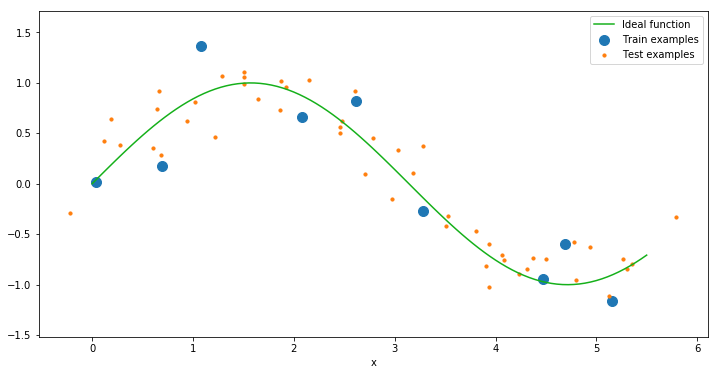

În unele cazuri, funcția $f$ din care provine setul de date (**X, t**) nu este una care sa poată fi aproximată printr-o simplă combinație liniară a **spatțiului de intrare** (i.e. a domeniului din care provine **X**).

Într-un astfel de caz, spațiul de intrare poate fi _transformat_ într-unul mai complex, având o capabilitate de modelare mai bogată.

Acest lucru se face prin intermediul unor _funcții de transformare_ $\phi$ care duc ${\bf x^{(n)}} \rightarrow \phi({\bf x^{(n)}})$.

Un exemplu îl reprezintă funcțiile de **transformări polinomiale** de tipul:
$$\phi_i(x) = x^i, \quad 0 \le i \le M$$
unde $M$ este gradul polinomului cu care se face transformarea.

Soluția de regresie liniară (în formă inchisă) devine atunci:


$${\bf w}^* = \underset{{\bf w}}{\arg\!\min} \sum_{n} \left({\bf \phi}^{(n)}{\bf w} - t^{(n)}\right)^2$$


$${\bf w}^* = \left({\bf \Phi}^\intercal {\bf \Phi}\right)^{-1} {\bf \Phi}^\intercal {\bf t} = {\bf \Phi}^{\dagger} {\bf t}$$

## 5. Regresie liniară cu regularizare

O soluție de optimizare în sensul celor mai mici pătrate (_ordinary least squares - OLS_), caută să găsească _cea mai bună potrivire_ (best fit) pentru punctele din setul de date dat la antrenare.

Acest lucru duce la construirea unui estimator **unbiased**, i.e. modelul nu va prefera _prioritizarea_ unui feature (i.e. un anume $\phi^{(n)}$) în detrimentul altuia.
În plus, daca _modelul este complex,_  iar _datele de antrenare sunt puține,_ optimizarea OLS poate duce la fenomenul de **overfit** (i.e. modelul este prea specific pe datele de antrenare, dar nu are o evaluare bună pe date de test).

Un proces de **regularizare** are ca scop impunerea unei restricții asupra parametrilor ${\bf w}$, astfel încât modelul să poată da un bias acelor feature-uri care sunt mai relevante (importante) în construirea estimatorului.

Soluția de **regresie liniară cu regularizare L2** se scrie astfel:

$${\bf w}^* = \underset{{\bf w}}{\arg\!\min} \sum_{n} \left({\bf \phi}^{(n)}{\bf w} - t^{(n)}\right)^2 + \alpha {\bf w^T}{\bf w} \equiv \underset{{\bf w: w^Tw \leq t(\alpha)}}{\arg\!\min} \sum_{n} \left({\bf \phi}^{(n)}{\bf w} - t^{(n)}\right)^2 $$ 

Soluția în formă închisă pentru regresia liniară cu regularizare L2 (eng. _Ridge Regression_) este dată prin:
$${\bf w}^* = \left({\bf \Phi}^\intercal {\bf \Phi} + \alpha I \right)^{-1} {\bf \Phi}^\intercal {\bf t}$$


### Dependențe

In [223]:
# Decomentați următoarele linii dacă nu aveți deja instalate bibliotecile
# !pip install numpy
# !pip install matplotlib

In [224]:
import numpy as np
import matplotlib.pyplot as plt

## 6. Generare seturi de date

In [225]:
DATASET_TYPE = "linear" # linear, polinomial, sin

In [226]:
def generate_examples(dataset_type = "linear", N = 9, noise = 0.2, dist_noise = 0.2):
    if dataset_type == "linear":
        X = np.linspace(0, 10, N)
        t = X * 0.25 + 1.75 + np.random.randn(N) * noise
        return X, t
    
    elif dataset_type == "polinomial":
        X = np.linspace(-1.5, 5.5, N)
        X += np.random.randn(N) * dist_noise
        t = .25*X * X - X + 1 + np.random.randn(N) * noise
        return X, t
    
    elif dataset_type == "sin":
        X = np.linspace(0, 1.75 * np.pi, N)
        X += np.random.randn(N) * dist_noise
        t = np.sin(X) + np.random.randn(N) * noise
        return X, t
    
    else:
        raise ValueError("Unknown dataset type: " + dataset_type)

## 6. Cerința 1: Implementare model de regresie liniară

### 6.1 Cerința 1.1: Implementarea modelului general de regresie liniară

In [227]:
class LinearRegression(object):
    
    """
    Modelul de Regresie Liniară
    y = X @ w 
        - valoarea prezisă de model
    t ~ N(t|X @ w, var) 
        - valorile de antrenare (target) fac parte dintr-o distribuție normală în jurul mediei X@w, 
          la care se adaugă zgomot dat de varianța `var`
    """

    def fit(self, X, t):
        """
        Antrenarea modelului in sensul celor mai mici patrate (least squares fitting)
        Parameterii
        ----------
        X : (N, D) np.ndarray
            variabilele de intrare
        t : (N,) np.ndarray
            variabilele țintă (target / ground truth)
        """
        # print(X.shape)
        N, D = X.shape
        
        # TODO calculați vectorul de ponderi w
        # Hint: operatorul de înmuțire de matricu în numpy este @
        # Hint: pentru a calcula psudo-inversa unei matrici M folosiți np.linalg.pinv(M)
        self.w = np.linalg.pinv(X) @ t # TODO
        
        self.var = np.mean(np.square(X @ self.w - t))

    def predict(self, X, return_std=False):
        """
        Întoarce valori prezise de model pentru sample-uri X
        Parametrii
        ----------
        X : (N, D) np.ndarray
            sample-uri de valori D-dimensionale pentru care se dorește predicția valorii conform modelului
        return_std : bool, optional
            întoarce deviația standard a fiecărei valori prezise, daca e setat pe True
        
        Întoarce
        -------
        y : (N,) np.ndarray
            vector de valori prezise
        y_std : (N,) np.ndarray
            deviația standard a fiecărei valori prezise
        """
        # N, D = X.shape
        
        # TODO calculați valoarea prezisă de modelul vostru
        y = X @ self.w # TODO
        
        if return_std:
            # TODO întoarceți un vector de aceeași dimensiune cu y, care 
            # are în fiecare poziție o valoare egală cu deviația standard a modelului antrenat
            # (i.e. sqrt(var))
            y_std = np.sqrt(self.var)  # TODO
            # y_std = np.zeros_like(y)
            return y, y_std
        return y

### 6.2 Cerința 1.2 Implementarea funcției de transformare polinomială
$$\phi_i(x) = x^i, \quad 0 \le i \le M$$

In [228]:
def extract_polynomial_features(X, M):
    # TODO întoarceți valorile phi_n astfel încât pentru fiecare 
    # intrare x linia phi_n este [1, x, x^2, ..., x^M]
    # Notă: phi trebuie sa fie la final un np.array de dimensiune (N, M+1), unde N este numărul de linii din X 
    # phi = X
    N = len(X)
    phi = np.ones((N, M+1))

    for i in range(1, M+1):
        phi[:, i] = X**i

    return phi

extract_polynomial_features(np.array([1, 2]), 2)
# Pentru intrarea
# [1 
#  2]
# ne așteptăm la ierșire să avem matricea
# [ 1 1 1
#   1 2 4 ]
# adică:
# array([[1., 1., 1.],
#        [1., 2., 4.]])

array([[1., 1., 1.],
       [1., 2., 4.]])

### 6.3 Cerința 1.3 Potrivirea unei drepte prin regresie liniară simplă

In [229]:
N_train = 10
N_test = 10
noise = 0.22

# X_train se genereaza ca np.array de dimensiune (N_train, 1) - de notat ca este de forma unei matrici
# t_train se genereaza ca np.array de dimensiune (N_train, ) - de notat ca este un vector, nu o matrice
# similar se genereaza si X_real si t_real, X_test si t_test

X_train, t_train = generate_examples(dataset_type="linear", N=N_train, noise=noise)
X_test, t_test = generate_examples(dataset_type="linear", N=N_test, noise=noise)
X_real, t_real = generate_examples(dataset_type="linear", N=N_test, noise=0.)


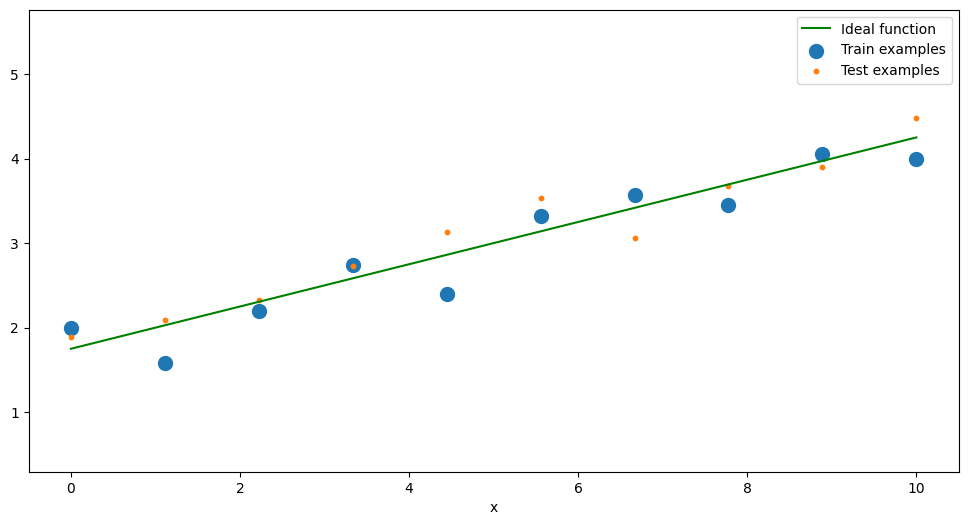

In [230]:
plt.figure(figsize=(12,6)); plt.axis('equal')
plt.plot(X_real, t_real, "green", label="Ideal function")
plt.scatter(X_train, t_train, s=100, label="Train examples")
plt.scatter(X_test, t_test, s=10, label="Test examples")
plt.xlabel("x")
plt.legend(bbox_to_anchor=(1, 1), loc='upper right', ncol=1)
plt.show()

In [231]:
y_train = np.zeros(X_train.size)
y_test = np.zeros(X_test.size)
y_test_std = np.zeros(X_test.size)

# TODO:
M = 2

# 1. Creați un model liniar instanțiind clasa LinearRegression
model = LinearRegression() # TODO

# 2. Folosiți funcția extract_polynomial_features pentru a introduce termenul de bias în matricile X_train și X_test
X_train_feat = extract_polynomial_features(X_train, M) # TODO
X_test_feat = extract_polynomial_features(X_test, M) # TODO

# 3. Antrenați modelul vostru, folosind model.fit(...)
model.fit(X_train_feat, y_train)

# 4. Obțineți predicția pe setul de antrenare și pe setul de test, folosind model.predict(...) 
y_train= model.predict(X_train_feat) # TODO
y_test, y_test_std = model.predict(X_test_feat, return_std=True) # TODO


In [232]:
def mean_squared_error(y, t):
    return np.mean((y - t) * (y- t))

In [233]:
print("Train error:", mean_squared_error(y_train, t_train))
print("Test  error:", mean_squared_error(y_test, t_test))

Train error: 9.261430074085629
Test  error: 10.129791433125693


#### Vizualizarea modelului învățat

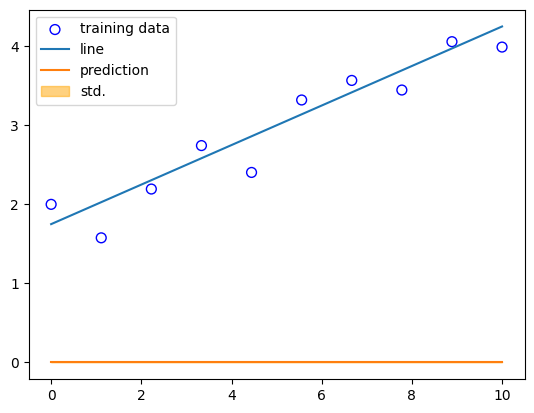

In [234]:
plt.scatter(X_train, t_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(X_real, t_real, label="line")
plt.plot(X_test, y_test, label="prediction")
plt.fill_between(
    X_test, y_test - y_test_std, y_test + y_test_std,
    color="orange", alpha=0.5, label="std.")
plt.legend()
plt.show()

## 7. Cerința 2.1: Implementare regresie liniară cu regularizare (Ridge Regression)

In [235]:
class RidgeRegression(LinearRegression):
    """
    Modelul de regresie liniară, folosind regularizare L2
    w* = argmin |t - X @ w| + alpha * |w|_2^2
    """


    def __init__(self, alpha:float=1.):
        super(RidgeRegression, self).__init__()
        self.alpha = alpha
        

    def fit(self, X:np.ndarray, t:np.ndarray):
        """
        Antrenarea modelului în sensul celor mai mici patrate (least squares fitting), ținând cont și de regularizare.
        Parameterii
        ----------
         X : (N, D) np.ndarray
            variabilele de intrare
        t : (N,) np.ndarray
            variabilele țintă (target / ground truth)
        """
        N, D = X.shape
        # TODO calculați vectorul de ponderi w, conform formulei de la punctul 5 
        # Hint: puteți inversa o matrice M cu np.linalg.solve(M)
        # Hint: matricea identitate este np.eye(dimensiune)
        self.w = np.linalg.solve(X.T @ X + self.alpha * np.eye(D), X.T @ t) # TODO
        self.var = np.mean(np.square(X @ self.w - t))


## 7.1 Cerința 2.2: Potrivirea funcției sin(x) cu feature-uri polinomiale

**Analizați** modelele de regresie liniară _cu_ și _fără_ regularizare. Ce concluzii se deduc din graficele de vizualizare și din valorile funcției de eroare?

In [236]:
N_train = 20 #@param {type: "slider", default: 10, min: 10, max: 100}
N_test = 20
noise = 0.22

X_train, t_train = generate_examples(dataset_type="sin", N=N_train, noise=noise)
X_test, t_test = generate_examples(dataset_type="sin", N=N_test, noise=noise)
X_real, t_real = generate_examples(dataset_type="sin", N=100, noise=.0, dist_noise=.0)

### Folosirea unui model de regresie liniară, _fără_ regularizare

In [237]:
M = 8 #@param {type: "slider", default: 8, min: 1, max: 15}
X_train_feat = extract_polynomial_features(X_train, M)
X_test_feat = extract_polynomial_features(X_test, M)

model = LinearRegression()
model.fit(X_train_feat, t_train)

y_train = model.predict(X_train_feat, return_std=False) 
y_test, y_test_std = model.predict(X_test_feat, return_std=True)

#### Vizualizarea modelului învățat

Train error: 0.02409645772334847
Test  error: 0.07655079185526573


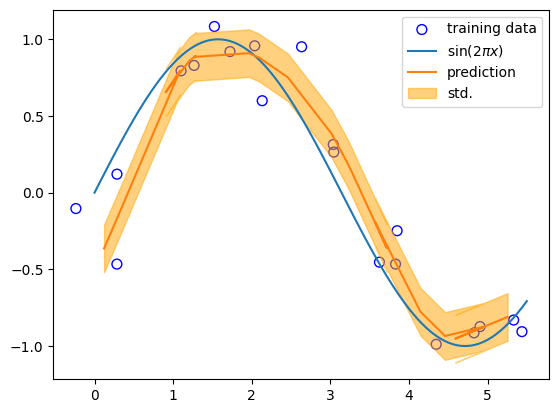

In [238]:
print("Train error:", mean_squared_error(y_train, t_train))
print("Test  error:", mean_squared_error(y_test, t_test))

# Plot
plt.scatter(X_train, t_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(X_real, t_real, label="$\sin(2\pi x)$")
plt.plot(X_test, y_test, label="prediction")
plt.fill_between(
    X_test, y_test - y_test_std, y_test + y_test_std,
    color="orange", alpha=0.5, label="std.")
plt.legend()
plt.show()

### Folosirea unui model de regresie liniară, _cu_ regularizare

In [239]:
model = RidgeRegression(alpha=1.75)
model.fit(X_train_feat, t_train)

y_train = model.predict(X_train_feat, return_std=False) 
y_test, y_test_std = model.predict(X_test_feat, return_std=True)

Train error: 0.038919295842275235
Test  error: 0.06728423879153778


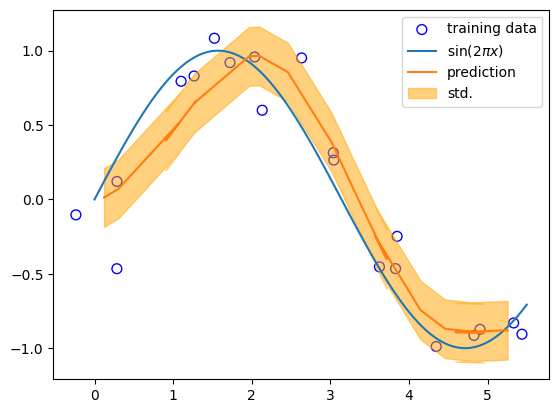

In [240]:
print("Train error:", mean_squared_error(y_train, t_train))
print("Test  error:", mean_squared_error(y_test, t_test))

# Plot
plt.scatter(X_train, t_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(X_real, t_real, label="$\sin(2\pi x)$")
plt.plot(X_test, y_test, label="prediction")
plt.fill_between(
    X_test, y_test - y_test_std, y_test + y_test_std,
    color="orange", alpha=0.5, label="std.")
plt.legend()
plt.show()

## 8. Cerința 3: Vizualizarea curbelor de antrenare și testare

**Analizați** curbele de _antrenare_ și _testare_ pentru modele de regresie liniară _cu_ și _fără_ regularizare, de **complexitate** diferită (M diferit).

Discutați graficele rezultate:
 * care este regimul de underfitting?
 * care este regimul de overfitting?
 * ce se intamplă dacă variați numărul de date de antrenare (valoarea lui N_train de la punctul 7.1)?

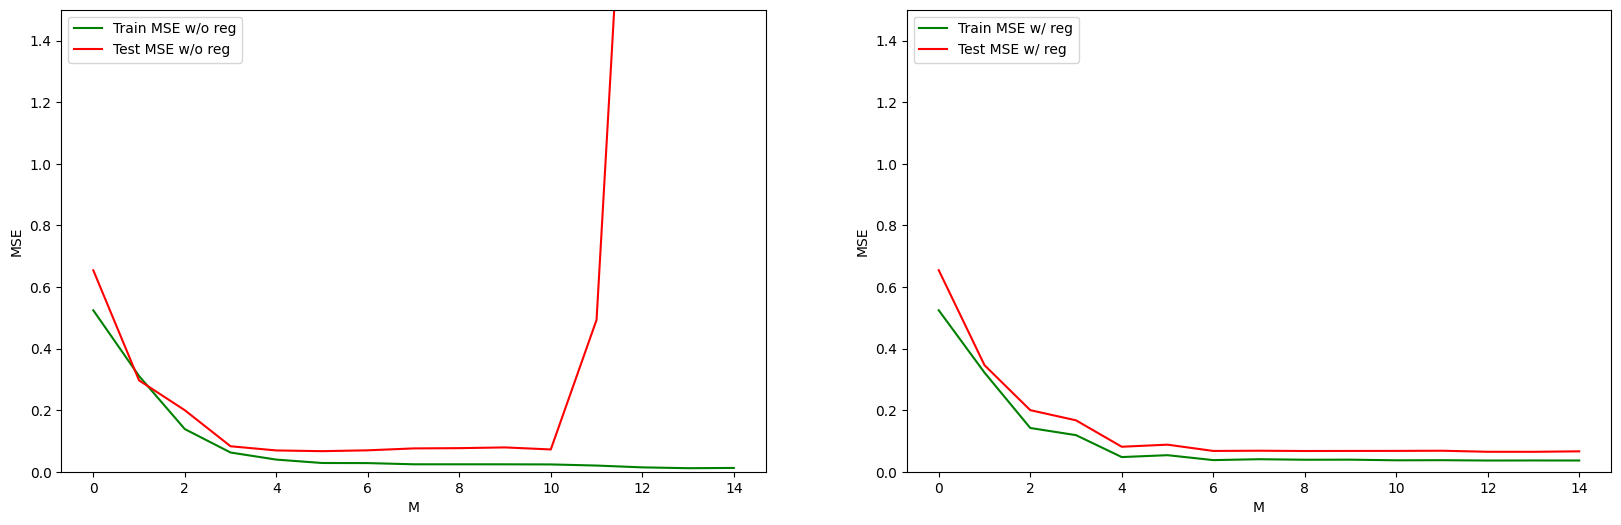

In [241]:
train_lin_mse = []
test_lin_mse = []

train_ridge_mse = []
test_ridge_mse = []

for M in range(15):
    X_train_feat = extract_polynomial_features(X_train, M)
    X_test_feat = extract_polynomial_features(X_test, M)
    
    model_linear = LinearRegression()
    model_ridge = RidgeRegression(alpha=1.75)
    
    model_linear.fit(X_train_feat, t_train)
    model_ridge.fit(X_train_feat, t_train)
    
    y_train_lin = model_linear.predict(X_train_feat)
    y_test_lin = model_linear.predict(X_test_feat)
    
    y_train_ridge = model_ridge.predict(X_train_feat)
    y_test_ridge = model_ridge.predict(X_test_feat)
    
    train_lin_mse.append(mean_squared_error(y_train_lin, t_train))
    test_lin_mse.append(mean_squared_error(y_test_lin, t_test))
    
    train_ridge_mse.append(mean_squared_error(y_train_ridge, t_train))
    test_ridge_mse.append(mean_squared_error(y_test_ridge, t_test))

plt.figure(figsize=(20,6))
# plot training/test curves depending on model size for LinearRegression
plt.subplot(1, 2, 1)
plt.plot(range(M+1), train_lin_mse, "green", label="Train MSE w/o reg")
plt.plot(range(M+1), test_lin_mse, "red", label="Test MSE w/o reg")
plt.xlabel("M")
plt.ylabel("MSE")
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
plt.ylim(0, 1.5)

# plot training/test curves depending on model size for RidgeRegression
plt.subplot(1, 2, 2)
plt.plot(range(M+1), train_ridge_mse, "green", label="Train MSE w/ reg")
plt.plot(range(M+1), test_ridge_mse, "red", label="Test MSE w/ reg")
plt.xlabel("M")
plt.ylabel("MSE")
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
plt.ylim(0, 1.5)

plt.show()